# 4. Analyzing time series and images

Bab ini menggabungkan keterampilan yang diperoleh sejauh ini dengan memeriksa data deret waktu (*time series*) dan gambar. Anda akan menyesuaikan plot data stok, menghasilkan histogram intensitas piksel gambar, dan meningkatkan kontras gambar melalui pemerataan histogram.

## Preparing Data and Library

In [6]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')

# Assign url
file_stocks = 'https://assets.datacamp.com/production/repositories/558/datasets/8dd58ff003e399765cdf348305783b842ff1d7eb/stocks.csv'

# Load data
stocks = pd.read_csv(file_stocks, parse_dates=True, index_col='Date')
aapl = stocks['AAPL']
ibm = stocks['IBM']
csco = stocks['CSCO']
msft = stocks['MSFT']

# Print data
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


## Visualizing time series

### Multiple time series on common axes

Untuk latihan ini, Anda akan membuat plot yang menunjukkan empat deret waktu pada sumbu yang sama. Rangkaian deret waktu yang dimaksud diwakili dalam sesi menggunakan pengidentifikasi `aapl`, `ibm`, `csco`, dan `msft`. Anda akan menghasilkan plot tunggal yang menunjukkan semua deret waktu pada sumbu umum dengan legenda.

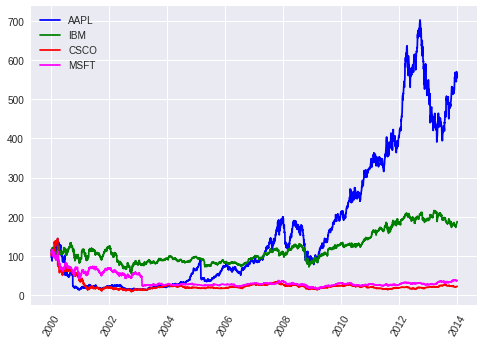

In [7]:
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

**Note** : Sepertinya `'AAPL'` telah bekerja dengan sangat baik dalam beberapa tahun terakhir!

### Multiple time series slices (1)

Anda dapat dengan mudah slice subsets yang sesuai dengan interval waktu yang berbeda dari rangkaian waktu. Secara khusus, Anda dapat menggunakan string seperti `'2001: 2005'`, `'2011-03: 2011-12'`, atau `'2010-04-19: 2010-04-30'` untuk mengekstraksi data dari interval waktu panjang 5 tahun, 10 bulan, atau 12 hari masing-masing.

* Tidak seperti slicing dari Python list standar, tuples, dan string, ketika slicing deret waktu menurut label (dan pandas Series & DataFrames oleh label), slice menyertakan bagian paling kanan dari slice. Yaitu, mengekstraksi `my_time_series['1990':'1995']` mengekstrak data dari `my_time_series` sesuai dengan `1990`, `1991`, `1992`, `1993`, `1994`, dan `1995` inklusif.
* Anda bisa menggunakan string parsial atau objek `datetime` untuk mengindeks dan slicing dari deret waktu.

Untuk latihan ini, Anda akan menggunakan slicing deret waktu untuk memplot deret waktu `aapl` di atas rentang 11 tahun penuh dan juga pada rentang 2 tahun yang lebih pendek. Anda akan mengatur plot-plot ini dalam grid subplot `2×1`.

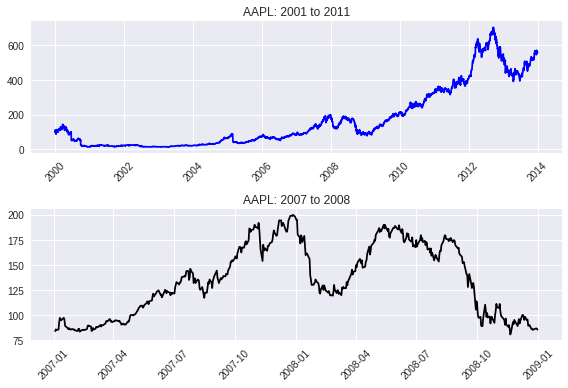

In [8]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

**Note** : Plotting deret waktu pada interval yang berbeda dapat memberi Anda wawasan yang lebih dalam tentang data Anda. Di sini, misalnya, Anda dapat melihat bahwa harga saham `AAPL` naik dan turun dalam jumlah besar antara 2007 dan 2008.

### Multiple time series slices (2)

Dalam latihan ini, Anda akan menggunakan deret waktu `aapl` yang sama dari latihan sebelumnya dan tampilan plot data yang lebih ketat.

* Pengindeksan string parsial berfungsi tanpa slicing juga. Misalnya, menggunakan `my_time_series['1995']`, `my_time_series['1999-05']`, dan `my_time_series['2000-11-04']` masing-masing mengekstrak tampilan deret waktu `my_time_series` sesuai dengan seluruh tahun 1995, seluruh bulan Mei 1999, dan sepanjang hari 4 November 2000.

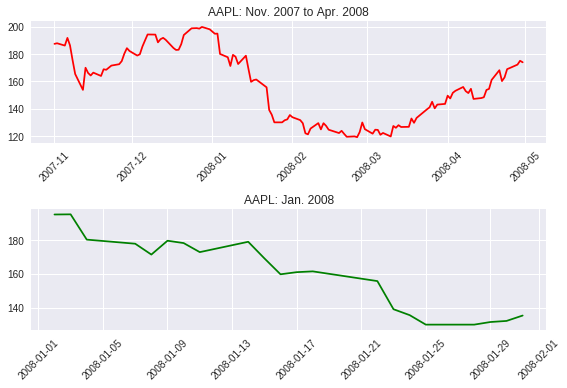

In [9]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2, 1, 1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view_1, color='red')

# Reassign the series by slicing the month January 2008
view_2 = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2, 1, 2)
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')
plt.plot(view_2, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

### Plotting an inset view

Ingat, daripada membandingkan plot dengan subplot atau plot overlay, Anda dapat membuat tampilan inset secara langsung menggunakan `plt.axes()`. Dalam latihan ini, Anda akan mereproduksi dua plot deret waktu dari dua latihan sebelumnya. Gambar Anda akan berisi plot inset untuk menyoroti perubahan dramatis dalam harga saham AAPL antara November 2007 dan April 2008 (dibandingkan dengan 11 tahun dari 2001 hingga 2011).

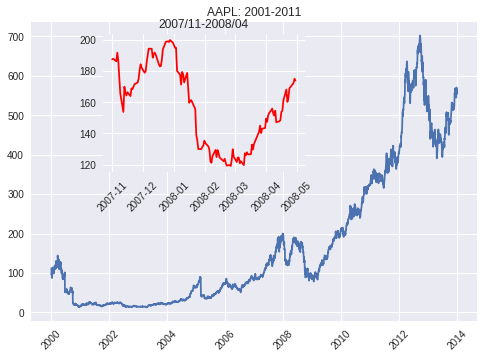

In [10]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

**Note** : Inset views adalah cara yang berguna untuk membandingkan data deret waktu.

## Time series with moving windows

### Plotting moving averages

Dalam latihan ini, Anda akan memetakan rata-rata pergerakan harga saham AAPL yang dihitung sebelumnya di subplot yang berbeda.

* Deret waktu `aapl` dilapis hitam di setiap subplot untuk perbandingan.
* Deret waktu `mean_30`, `mean_75`, `mean_125`, dan `mean_250` telah dihitung untuk Anda (berisi rata-rata berjenjang dari series `aapl` yang dihitung pada jenjang (*windows*) dengan lebar masing-masing 30 hari, 75 hari, 125 hari, dan 250 hari).

In [20]:
# Create rolling window
mean_30 = aapl.rolling(30).mean()
mean_75 = aapl.rolling(75).mean()
mean_125 = aapl.rolling(125).mean()
mean_250 = aapl.rolling(250).mean()

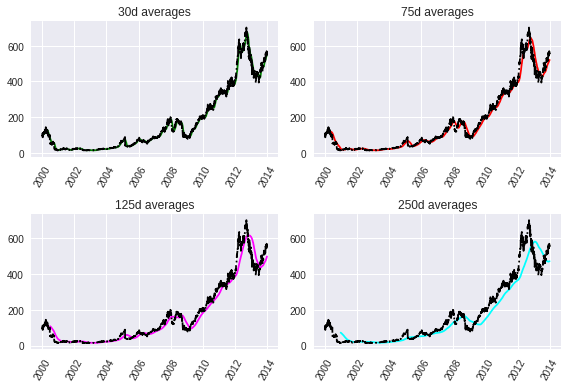

In [22]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2, 2, 1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2, 2, 2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Improve spacing and display the plot
plt.tight_layout()

# Display the plot
plt.show()

### Plotting moving standard deviations

Setelah memplot rata-rata pergerakan harga saham AAPL pada subplot yang berbeda di latihan sebelumnya, Anda sekarang akan plotting pergerakan standar deviasi yang dikomputasi sebelumnya dari harga saham yang sama, kali ini bersama-sama menggunakan sumbu umum.

* Deret waktu `aapl` tidak diplot dalam kasus ini; ini memiliki skala panjang yang berbeda dari standar deviasi.
* Deret waktu `std_30`, `std_75`, `std_125`, & `std_250` telah dihitung untuk Anda (berisi standar deviasi berjenjang dari series `aapl` yang dihitung pada jenjang (*windows*) dengan lebar masing-masing 30 hari, 75 hari, 125 hari, & 250 hari).

In [24]:
# Create rolling window
std_30 = aapl.rolling(30).std()
std_75 = aapl.rolling(75).std()
std_125 = aapl.rolling(125).std()
std_250 = aapl.rolling(250).std()

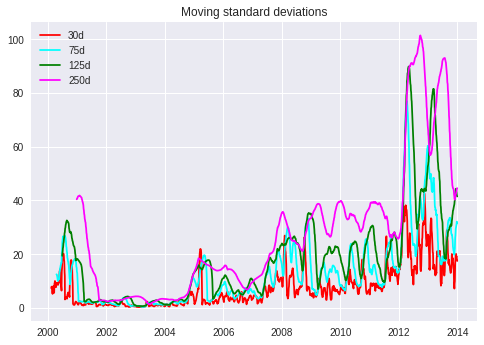

In [25]:
# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

### Interpreting moving statistics

Pada plot sebelumnya, berapa panjang pergerakan jendela yang paling konsisten menghasilkan varians terbesar (standar deviasi) dalam harga saham AAPL selama interval waktu yang ditunjukkan?

**Answer** : 250 days

**Note** : Pergerakan jendela yang lebih luas menerima variabilitas yang lebih besar!

## Histogram equalization in images

### Extracting a histogram from a grayscale image

Untuk gambar skala abu-abu, berbagai algoritma pemrosesan gambar menggunakan histogram gambar. Ingatlah bahwa gambar adalah array dua dimensi dari intensitas numerik. Sebuah histogram gambar, kemudian dihitung dengan menghitung kemunculan intensitas piksel berbeda dari semua piksel dalam gambar.

Anda akan memplot gambar dan menggunakan nilai intensitas piksel untuk memplot histogram intensitas piksel yang dinormalisasi.

*Sumber gambar: https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg*

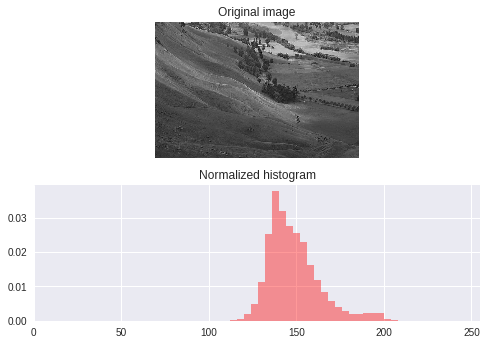

In [27]:
# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), density=True, color='red', alpha=0.4)

# Display the plot
plt.show()

**Note** : Histogram gambar adalah komponen penting dari banyak algoritma pemrosesan gambar.

### Cumulative Distribution Function from an image histogram

Histogram dari variabel acak kontinu kadang-kadang disebut Fungsi Distribusi Probabilitas (atau PDF). Area di bawah PDF (integral pasti) disebut Fungsi Distribusi Kumulatif (atau CDF). CDF menghitung kemungkinan mengamati intensitas piksel tertentu.

Tugas Anda di sini adalah memplot intensitas piksel PDF dan CDF dari gambar skala abu-abu.

* Opsi histogram `cumulative=True` memungkinkan melihat CDF, bukan PDF.
* Perhatikan bahwa `plt.grid('off')` menonaktifkan garis grid yang mengganggu.
* Perintah `plt.twinx()` memungkinkan dua plot untuk overlay berbagi sumbu x tetapi dengan skala yang berbeda pada sumbu y.

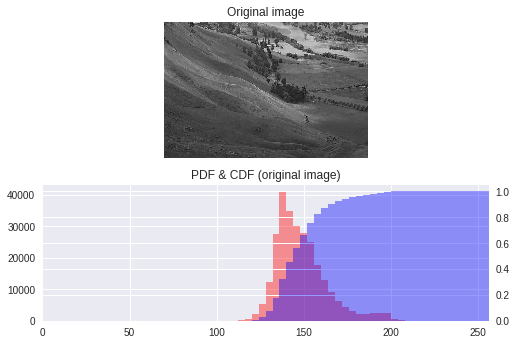

In [28]:
# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               density=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

**Note** : Perhatikan bahwa histogram tidak terpusat dengan baik pada kisaran intensi piksel yang mungkin. CDF naik tajam di dekat bagian tengah (yang berhubungan dengan keabuan keseluruhan gambar).

### Equalizing an image histogram

[Pemerataan histogram](https://en.wikipedia.org/wiki/Histogram_equalization) adalah prosedur pemrosesan gambar yang menetapkan ulang intensitas piksel gambar. Ide dasarnya adalah menggunakan interpolasi untuk memetakan CDF asli dari intensitas piksel ke CDF yang hampir merupakan garis lurus. Intinya, intensitas piksel tersebar dan ini memiliki efek praktis untuk menghasilkan gambar yang lebih tajam dan kontras. Ini sangat berguna dalam astronomi dan pencitraan medis untuk membantu kami melihat lebih banyak fitur.

* Array `image` dan `pixels` diekstraksi untuk Anda sebelumnya.
* CDF dari gambar asli dihitung menggunakan `plt.hist()`.
* Perhatikan array `new_pixels` dibuat untuk Anda yang menginterpolasi nilai piksel baru menggunakan CDF gambar asli.

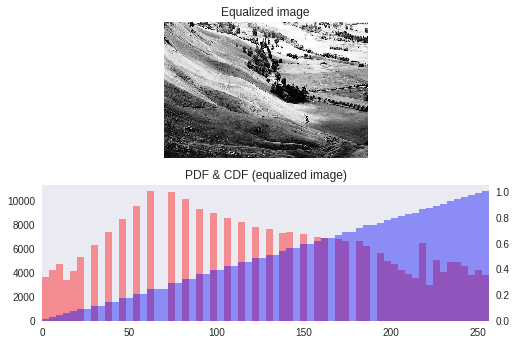

In [32]:
# Import numpy
import numpy as np

# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid(b=None)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid(b=None)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()

**Note** : Pemerataan histogram dapat membantu membuat gambar lebih tajam.

### Extracting histograms from a color image

Latihan ini menyerupai yang terakhir di mana Anda akan plotting histogram dari suatu gambar.

Saluran RGB (red-green-blue) terpisah akan diekstraksi untuk Anda masing-masing sebagai array dua dimensi, `red`, `green`, dan `blue`. Anda akan memplot tiga histogram warna yang dilapiskan pada sumbu umum (satu untuk setiap saluran) di subplot serta gambar asli di subplot terpisah.

*Sumber gambar : http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg*

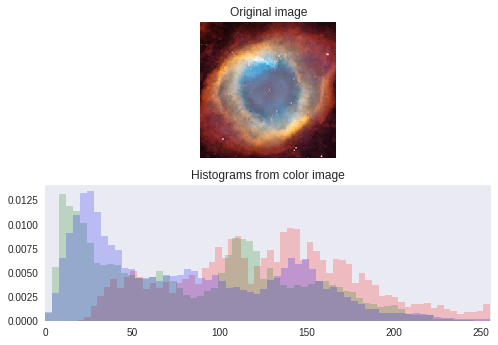

In [38]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)
plt.grid(b=None)

# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
plt.grid(b=None)

# Display the plot
plt.show()

**Note** : Perhatikan bagaimana histogram yang dihasilkan dari gambar berwarna ini berbeda dari histogram yang Anda buat sebelumnya dari gambar skala abu-abu.

### Extracting bivariate histograms from a color image

Daripada overlay histogram intensitas univariat di saluran yang berbeda, juga dimungkinkan untuk melihat variasi gabungan intensitas piksel dalam dua saluran yang berbeda.

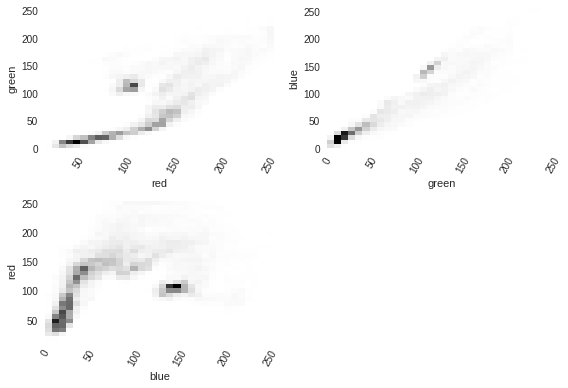

In [40]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.tight_layout()
plt.show()